### Preprocessing SibSp&Parch Feature
### 가설을 세우기 가장 재밋는 데이터이자 느낌적으로 정확도를 높일 수 있는 key 가 되는 데이터라고 생각한다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

train =pd.read_csv('adjtrain.csv', index_col=0)
test = pd.read_csv('adjtest.csv', index_col=0)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
 11  Title     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [3]:
train.isin([0]).sum()

Survived    549
Pclass        0
Name          0
Sex           0
Age           0
SibSp       608
Parch       678
Ticket        0
Fare         15
Cabin         0
Embarked      0
Title         0
dtype: int64

In [4]:
test.isin([0]).sum()

Pclass        0
Name          0
Sex           0
Age           0
SibSp       283
Parch       324
Ticket        0
Fare          2
Cabin         0
Embarked      0
Title         0
dtype: int64

In [6]:
train_test_data = [train, test]

In [7]:
for dataset in train_test_data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch']

train.head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [108]:
train[['Family','Survived']].groupby(['Family']).sum()

,Survived
Family,
0,163
1,89
2,59
3,21
4,3
5,3
6,4
7,0
10,0


In [109]:
subdata = pd.crosstab(train['Family'],train['Survived'])
subdata


Survived,0,1
Family,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


In [110]:
subdata_2 = pd.crosstab(test['Family'],test['Sex'])
subdata_2

Sex,female,male
Family,,
0,68,185
1,36,38
2,30,27
3,10,4
4,2,5
5,2,1
6,1,3
7,1,1
10,2,2


In [111]:
subdata['survival rate'] = round(subdata[1]/(subdata[0] + subdata[1]),2)
subdata 

Survived,0,1,survival rate
Family,,,
0,374,163,0.30
1,72,89,0.55
2,43,59,0.58
3,8,21,0.72
4,12,3,0.20
5,19,3,0.14
6,8,4,0.33
7,6,0,0.00
10,7,0,0.00


In [112]:
subset1 = pd.crosstab(train['Sex'],train['Survived'])
subset1

Survived,0,1
Sex,,
female,81,233
male,468,109


In [113]:
round((subset1[1]/(subset1[0] + subset1[1]))*100,2)

Sex
female    74.20
male      18.89
dtype: float64

### 데이터를 통해 확인할 수 있는 정보

## 1.동승자는 가족으로 한정된다.
### 즉, 친구, 연인 등과 탑승한 승객은 동승자가 0명이다.

## 2. 여성의 생존률은 남성보다 우월하게 높다.
### female 74.20% / male 18.89%

## 3. 1 ~ 3 명의 가족과 함께 탑승한 그룹은 다른 그룹에 비해 생존률이 우월하게 높다.

### 이를 통해 세울 수 있는 가설

## 1. 동승자 7,10 그룹의 생존률 0 

### 대규모 집단의 특성
### 집단은 커질수록 민첩한 행동, 빠른 결단력이 부족해진다. 이 때문에 빠른 판단과 행동이 중요한 재앙에선 생존률은 자연히 내려갈 것이다.  

### 그렇다고 생존률이 0인 것은 무리가 아닌가?
### 당신과 당신의 가족이 죽을 위기에 처했고 당신은 가족을 살리기 위해 자신을 제외한 가족 중 한명을 지명해야한다. 선택했는가? 아버지라고 해보자

### 나에게 아버지는 모든지 해낼 수 있는 슈퍼맨이었다. 그 슈퍼맨은 이제 곧 죽게 될 것이다. 코밑까지 차오르는 물 앞에 저항 한 번 하지 못한 채 발버둥치다 숨이 멎게 될 것이다.

### 슬프다. 그 장면을 상상하는 것만으로도 우리 가족은 고통을 느낄 것이다. 그래 다같이 살 수 없다면 아버지가 느낄 고통을 우리 가족은 함께하겠다.

## 2. 동승자 1 그룹의 생존률 0.55

### 이들의 생존 case 는 총 3가지 1.모두 살거나 2.모두 죽거나 3.둘 중 한명만 살거나
### 0.5에 근접한다고 해서 절대 3번째이라고 추정해서는 안되는 것은 분명하다. 
### 당신의 선택은 어떠한가 1,2 번이 주를 이뤄서 0.55에 근접한다고 생각하는가? 3 번이 주를 이뤄서 0.55에 근접한다고 생각하는가
### 엄연히 가설일 뿐이다. 하지만 이 가설의 옳고 그름을 판별할 수 있는 key 가 있기 때문에 설명한다.
### 그 key는 name(name은 결측지가 없다.) 이다. 미국의 경우 결혼을 하게 되면 한쪽의 성을 따르게 된다. 동승자 수와 성이 같다면 같은 그룹으로 취급하고 이 그룹에서 몇 명씩 생존했는지 보면 될 것이다.



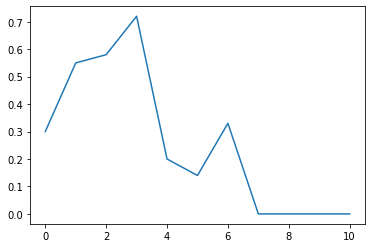

In [114]:
plt.plot(subdata['survival rate'])

In [123]:
for dataset in train_test_data:
    dataset['Family'] = dataset['Family'].replace(0,'S')
    dataset['Family'] = dataset['Family'].replace([1,2,3],'M')
    dataset['Family'] = dataset['Family'].replace([4,5,6,7,8,9,10],'B')



<BarContainer object of 3 artists>

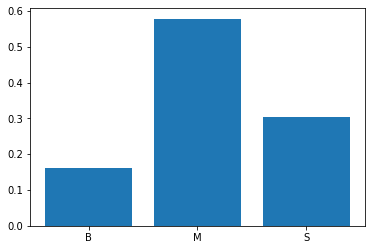

In [146]:
subset = pd.crosstab(train['Family'],train['Survived'])
subset['Aveg'] = subset[1]/(subset[0] + subset[1])
subset

x = ['B','M','S']
plt.bar(x=x, height=subset['Aveg'])


In [9]:
adjtrain = train.to_csv('adjtrain.csv')
adjtest = test.to_csv('adjtest.csv')